In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#To load dataset kyphosis
df=pd.read_csv('kyphosis.csv')
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [3]:
#to see the null values
df.isnull().sum()

Kyphosis    0
Age         0
Number      0
Start       0
dtype: int64

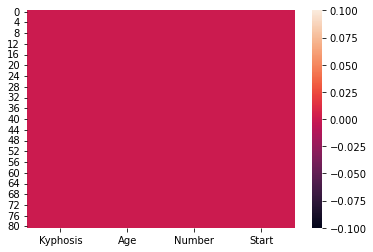

In [4]:
#to see the null values visually
sb.heatmap(df.isnull())
plt.show()

In [5]:
#to see datatypes
df.dtypes

Kyphosis    object
Age          int64
Number       int64
Start        int64
dtype: object

In [6]:
#to see the no of rows and cols
df.shape

(81, 4)

In [7]:
#to see no of duplicate entries
df.duplicated().sum()

0

In [8]:
#to see mean median etc
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [9]:
#to show all information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [10]:
#here the col kyphosis is the output and rest other cols are input 
#but we can see that the col kyphosis is in object datatype so first lets covert into numeric
#we ll use label encoder here

In [11]:
#to see the no of categories 
df['Kyphosis'].unique()

array(['absent', 'present'], dtype=object)

In [12]:
#call label encoder
from sklearn.preprocessing import LabelEncoder

In [13]:
#create a object for LabelEncoder class
le=LabelEncoder()
df['Kyphosis']=le.fit_transform(df['Kyphosis'])

In [14]:
#to see LabelEncoder worked or not
df.head()

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15


In [15]:
#to see datatypes
df.dtypes

Kyphosis    int32
Age         int64
Number      int64
Start       int64
dtype: object

In [16]:
#to select input and output
X=df[['Age','Number','Start']] #dropping so rest others stay as input 
Y=df['Kyphosis'] #output

In [17]:
X.head()

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15


In [18]:
#to see that data is balanced or not
df['Kyphosis'].value_counts()  #we can see that data is imbalanced

0    64
1    17
Name: Kyphosis, dtype: int64

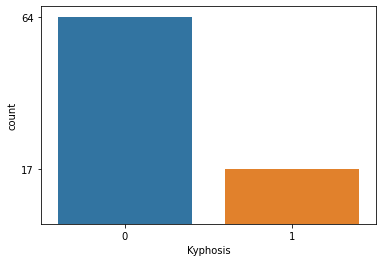

In [19]:
#to visualize the above
sb.countplot(data=df,x='Kyphosis')
f=df['Kyphosis'].value_counts()
plt.yticks(f)
plt.show()

In [20]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [21]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((56, 3), (25, 3), (56,), (25,))

In [22]:
X_train.head()

,Age,Number,Start
61,114,7,8
73,206,4,10
67,159,4,13
26,8,3,6
79,42,7,6


In [23]:
#to apply StandardScaler 
from sklearn.preprocessing import StandardScaler
#to create an object of StandardScaler
ss=StandardScaler()
#to apply 
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [24]:
#create a function 
def create_model(model): #model is user defined which holds the object of algo
    #train the model
    model.fit(X_train,Y_train)
    #test the data
    Y_pred=model.predict(X_test)
    #Generate report
    print(confusion_matrix(Y_test,Y_pred))
    print(classification_report(Y_test,Y_pred))
    return model

In [25]:
#to apply LogisticRegression ,confusion_matrix ,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report

In [26]:
#create an object
lr=LogisticRegression()

In [27]:
#call function
lr=create_model(lr)

[[19  0]
 [ 5  1]]
              precision    recall  f1-score   support

           0       0.79      1.00      0.88        19
           1       1.00      0.17      0.29         6

    accuracy                           0.80        25
   macro avg       0.90      0.58      0.58        25
weighted avg       0.84      0.80      0.74        25



In [28]:
#we can see that f1 score diff between 0 & 1 is more 
#Here We saw , more score difference between 0 and 1 class ,the reason can be  Data unbalance(output variable)

In [29]:
#to balance the data we ll use RandomOverSampler of Sampling Technique
#RandomOverSampler
from imblearn.over_sampling import RandomOverSampler

In [30]:
X_train.shape,Y_train.shape

((56, 3), (56,))

In [31]:
Y_train.value_counts()

0    45
1    11
Name: Kyphosis, dtype: int64

In [32]:
#to convert minority class to majority class using RandomOverSampler
#create an object for RandomOverSampler
ros=RandomOverSampler(random_state=1)

In [33]:
#apply oversampler on training data
X_train_ros,Y_train_ros=ros.fit_resample(X_train,Y_train)

In [34]:
#check oversampler has worked or not
Y_train_ros.value_counts()

1    45
0    45
Name: Kyphosis, dtype: int64

In [35]:
X_train_ros.shape,Y_train_ros.shape

((90, 3), (90,))

In [36]:
#similarly apply on testing data
#first check
Y_test.value_counts()

0    19
1     6
Name: Kyphosis, dtype: int64

In [37]:
#apply oversampler on testing data
X_test_ros,Y_test_ros=ros.fit_resample(X_test,Y_test)

In [38]:
#check oversampler has worked or not
Y_test_ros.value_counts()

0    19
1    19
Name: Kyphosis, dtype: int64

In [39]:
X_test_ros.shape,Y_test_ros.shape

((38, 3), (38,))

In [40]:
#data balancing done 

In [41]:
#train the model with X_train_ros,Y_train_ros
lr=LogisticRegression()
lr.fit(X_train_ros,Y_train_ros)

LogisticRegression()

In [42]:
#test the data
Y_pred=lr.predict(X_test_ros)
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1])

In [43]:
#confusion matrix
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(Y_test_ros,Y_pred))
print(classification_report(Y_test_ros,Y_pred))

[[15  4]
 [14  5]]
              precision    recall  f1-score   support

           0       0.52      0.79      0.62        19
           1       0.56      0.26      0.36        19

    accuracy                           0.53        38
   macro avg       0.54      0.53      0.49        38
weighted avg       0.54      0.53      0.49        38



In [44]:
#here we can see the differnce in scores is till huge 
#lets now try it with DecisionTreeClassifier

In [45]:
#perform DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

In [46]:
#to create an object
dt=DecisionTreeClassifier(random_state=1) #by default gini index method

In [47]:
#call function
dt=create_model(dt)

[[15  4]
 [ 4  2]]
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        19
           1       0.33      0.33      0.33         6

    accuracy                           0.68        25
   macro avg       0.56      0.56      0.56        25
weighted avg       0.68      0.68      0.68        25



In [48]:
dict={'Input':X.columns,'IG':dt.feature_importances_}
df1=pd.DataFrame(dict)
df1.sort_values('IG',ascending=False,ignore_index=True)

,Input,IG
0,Start,0.497082
1,Age,0.333221
2,Number,0.169697


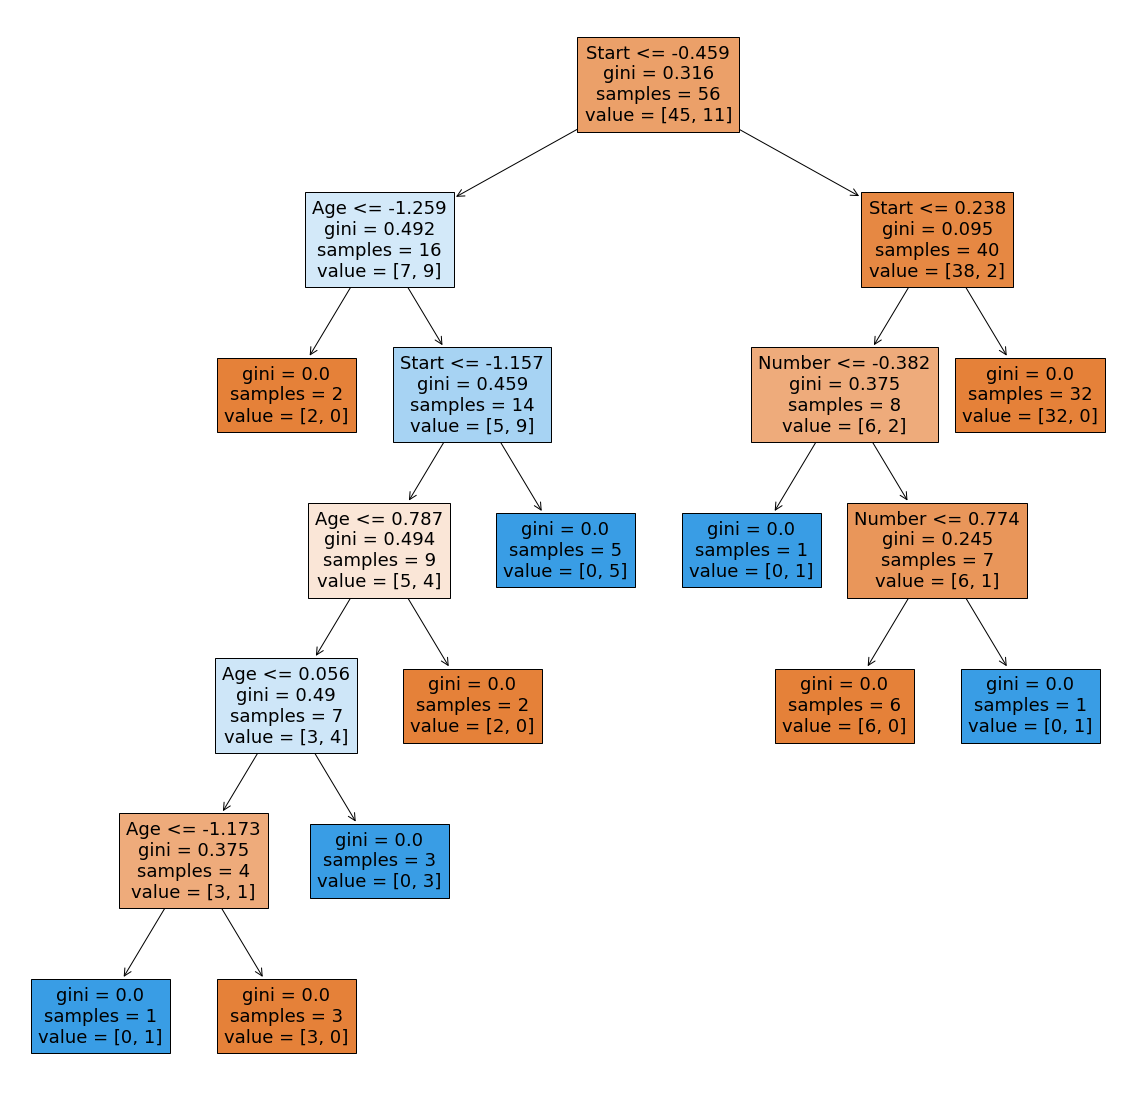

In [49]:
#create a tree
from sklearn import tree
features=X.columns
plt.figure(figsize=(20,20))
_=tree.plot_tree(dt,feature_names=features,filled=True)

In [50]:
#to see with max_depth (pruning technique)
'''
for i in range(8,1,-1):
    dt1=DecisionTreeClassifier(random_state=1,max_depth=i)
    print('max depth: ',i)
    #call function
    dt1=create_model(dt1)
'''
dt1=DecisionTreeClassifier(random_state=1,max_depth=4) #by default gini index method

In [51]:
#call function
dt1=create_model(dt1)

[[14  5]
 [ 3  3]]
              precision    recall  f1-score   support

           0       0.82      0.74      0.78        19
           1       0.38      0.50      0.43         6

    accuracy                           0.68        25
   macro avg       0.60      0.62      0.60        25
weighted avg       0.72      0.68      0.69        25



In [52]:
dict={'Input':X.columns,'IG':dt1.feature_importances_}
df1=pd.DataFrame(dict)
df1.sort_values('IG',ascending=False,ignore_index=True)

,Input,IG
0,Start,0.616681
1,Number,0.210526
2,Age,0.172793


In [53]:
#to see with min_samples_leaf (pruning technique)
'''
for i in range(45,101):
    dt2=DecisionTreeClassifier(random_state=1,min_samples_leaf=i)
    print('min_samples_leaf: ',i)
    #call function
    dt2=create_model(dt2)
'''
dt2=DecisionTreeClassifier(random_state=1,min_samples_leaf=45)

In [54]:
#call function
dt2=create_model(dt2)

[[19  0]
 [ 6  0]]
              precision    recall  f1-score   support

           0       0.76      1.00      0.86        19
           1       0.00      0.00      0.00         6

    accuracy                           0.76        25
   macro avg       0.38      0.50      0.43        25
weighted avg       0.58      0.76      0.66        25



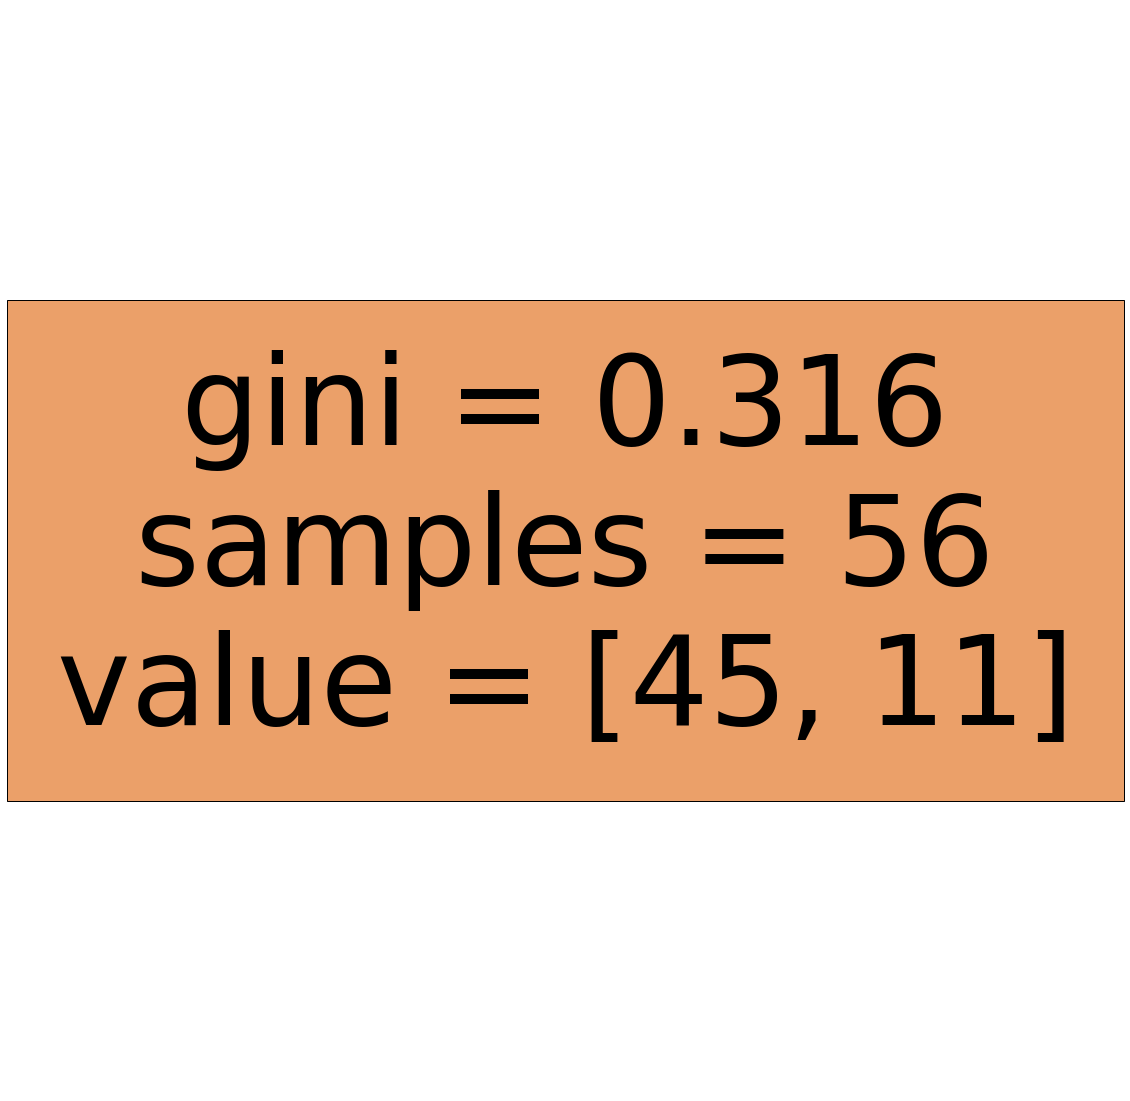

In [55]:
#create a tree
from sklearn import tree
features=X.columns
plt.figure(figsize=(20,20))
_=tree.plot_tree(dt2,feature_names=features,filled=True)

In [56]:
dict={'Input':X.columns,'IG':dt2.feature_importances_}
df1=pd.DataFrame(dict)
df1.sort_values('IG',ascending=False,ignore_index=True)

,Input,IG
0,Age,0.0
1,Number,0.0
2,Start,0.0


In [57]:
#now to see with entropy method

In [58]:
#first create object of DecisionTreeClassifier and pass criterion='entropy' as an paramter
dt=DecisionTreeClassifier(random_state=1,criterion='entropy') #no pruning technique

In [59]:
#call function
dt=create_model(dt)

[[17  2]
 [ 4  2]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        19
           1       0.50      0.33      0.40         6

    accuracy                           0.76        25
   macro avg       0.65      0.61      0.62        25
weighted avg       0.74      0.76      0.74        25



In [60]:
dict={'Input':X.columns,'IG':dt.feature_importances_}
df1=pd.DataFrame(dict)
df1.sort_values('IG',ascending=False,ignore_index=True)

,Input,IG
0,Start,0.453347
1,Age,0.424722
2,Number,0.121931


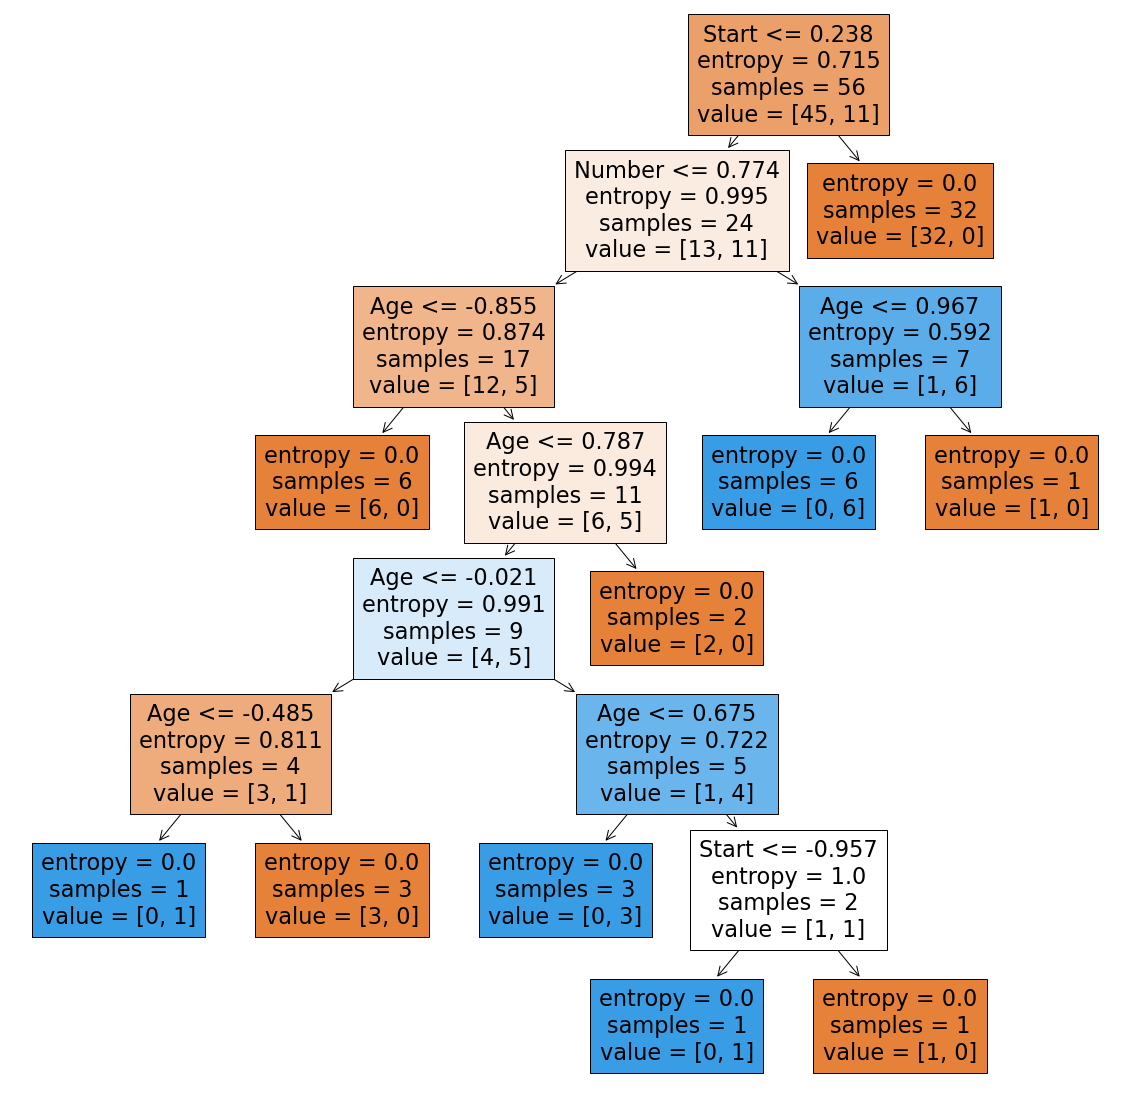

In [61]:
#create a tree
from sklearn import tree
features=X.columns
plt.figure(figsize=(20,20))
_=tree.plot_tree(dt,feature_names=features,filled=True)

In [62]:
#applying pruning technique
'''
for i in range(1,9):
    dt1=DecisionTreeClassifier(random_state=1,criterion='entropy',max_depth=i)
    print('max depth: ',i)
    #call function
    dt1=create_model(dt1)
'''
dt1=DecisionTreeClassifier(random_state=1,criterion='entropy',max_depth=4)
#call function
dt1=create_model(dt1)

[[15  4]
 [ 3  3]]
              precision    recall  f1-score   support

           0       0.83      0.79      0.81        19
           1       0.43      0.50      0.46         6

    accuracy                           0.72        25
   macro avg       0.63      0.64      0.64        25
weighted avg       0.74      0.72      0.73        25



In [63]:
dict={'Input':X.columns,'IG':dt1.feature_importances_}
df1=pd.DataFrame(dict)
df1.sort_values('IG',ascending=False,ignore_index=True)

,Input,IG
0,Start,0.519051
1,Age,0.324054
2,Number,0.156896


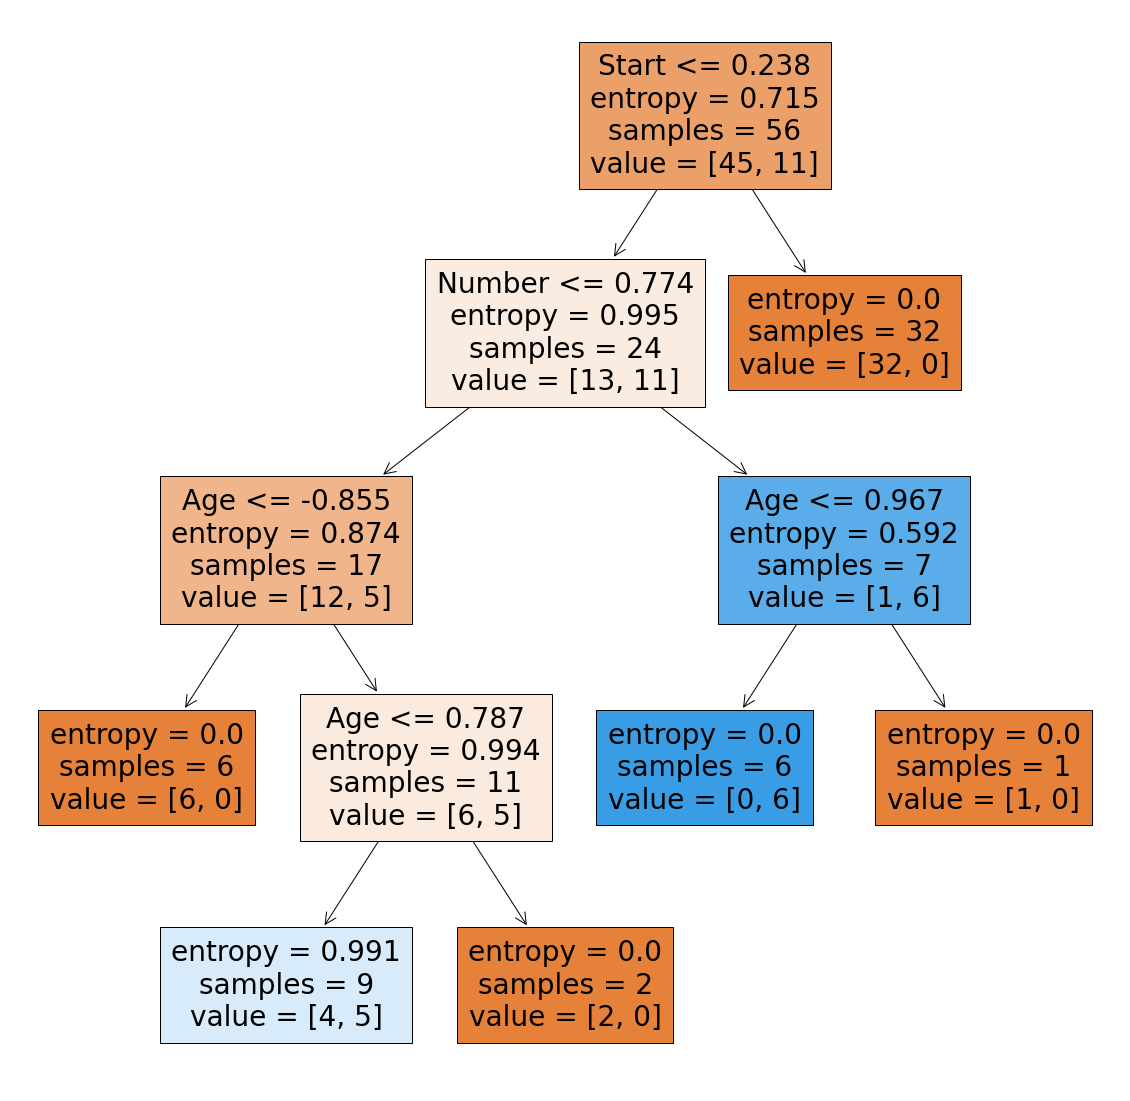

In [64]:
#create a tree
from sklearn import tree
features=X.columns
plt.figure(figsize=(20,20))
_=tree.plot_tree(dt1,feature_names=features,filled=True)

In [65]:
#now lets see with min_samples_leaf
#create object of DecisionTreeClassifier class 
'''
for i in range(45,101):
    dt=DecisionTreeClassifier(random_state=1,min_samples_leaf=i,criterion='entropy') 
    print("mi sample leaf: ",i)
    dt=create_model(dt)
'''
dt=DecisionTreeClassifier(random_state=1,min_samples_leaf=45,criterion='entropy') 
dt=create_model(dt)

[[19  0]
 [ 6  0]]
              precision    recall  f1-score   support

           0       0.76      1.00      0.86        19
           1       0.00      0.00      0.00         6

    accuracy                           0.76        25
   macro avg       0.38      0.50      0.43        25
weighted avg       0.58      0.76      0.66        25



In [66]:
dict={'Input':X.columns,'IG':dt.feature_importances_}
df1=pd.DataFrame(dict)
df1.sort_values('IG',ascending=False,ignore_index=True)

,Input,IG
0,Age,0.0
1,Number,0.0
2,Start,0.0


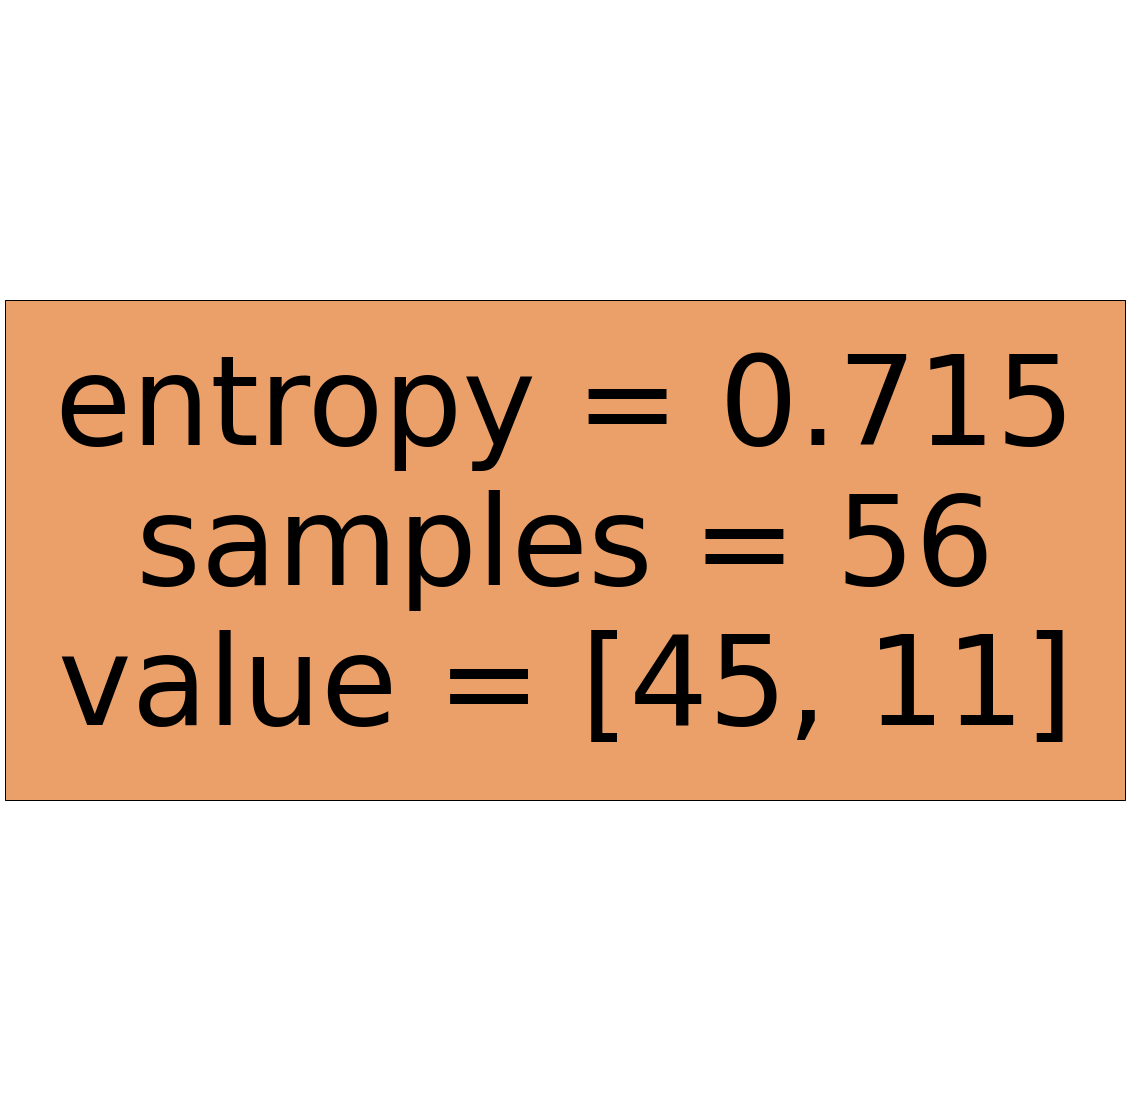

In [67]:
#create a tree
from sklearn import tree
features=X.columns
plt.figure(figsize=(20,20))
_=tree.plot_tree(dt,feature_names=features,filled=True)

In [68]:
'''Score of LogisticRegression with unbalanced data for 0 is 1.00 and 1 is 0.17
Score of LogisticRegression with balanced data for 0 is 0.79 and 1 is 0.26
Score of Decision Tree(Gini Index) for 0 is 0.79 and 1 is 0.33
Score of Decision Tree(Gini Index) using hyperparameter as max_depth for 0 is 0.74 and 1 is 0.50
Score of Decision Tree(Gini Index) using hyperparameter as min_samples_leaf for 0 is 1.00 and 1 is 0.00
Score of Decision Tree(Entropy) for 0 is 0.89 and 1 is 0.33
Score of Decision Tree(Entropy) using hyperparameter as max_depth for 0 is 0.79 and 1 is 0.50
Score of Decision Tree(Entropy) using hyperparameter as min_samples_leaf for 0 is 1.00 and 1 is 0.00'''

'Score of LogisticRegression with unbalanced data for 0 is 1.00 and 1 is 0.17\nScore of LogisticRegression with balanced data for 0 is 0.79 and 1 is 0.26\nScore of Decision Tree(Gini Index) for 0 is 0.79 and 1 is 0.33\nScore of Decision Tree(Gini Index) using hyperparameter as max_depth for 0 is 0.74 and 1 is 0.50\nScore of Decision Tree(Gini Index) using hyperparameter as min_samples_leaf for 0 is 1.00 and 1 is 0.00\nScore of Decision Tree(Entropy) for 0 is 0.89 and 1 is 0.33\nScore of Decision Tree(Entropy) using hyperparameter as max_depth for 0 is 0.79 and 1 is 0.50\nScore of Decision Tree(Entropy) using hyperparameter as min_samples_leaf for 0 is 1.00 and 1 is 0.00'

In [ ]:
#we can see that from the given dataset the best score is of 
#Decision Tree(Gini Index) using hyperparameter as max_depth for 0 is 0.74 and 1 is 0.50